# Quick introduction

In [1]:
%matplotlib inline
import arviz as az  # import arviz

In [2]:
az.style.use('arviz-darkgrid')  # This is just and alias for plt.style

Most or ArviZ functions require a `trace` as the main argument. Currently ArviZ will work with either a PyMC3 `trace` or a Pandas DataFrame. Internally ArviZ turns the former into the latter. To show some of the functionality or ArviZ we are going to load a previously saved trace. Arviz can save traces as (optionally compressed) csv files.

    az.save_trace(trace)

In [3]:
trace = az.load_trace('trace.gzip')
trace.head()

,a,a,b__0,b__1,b__0,b__1
0,1,1,1.005630,1.559558,0.869977,-1.644747
1,2,2,-1.034746,-1.211584,-1.091546,0.779200
2,1,3,-0.843553,-0.896655,-1.017175,-1.371468
3,1,1,-0.843553,-0.896655,0.215773,1.358521
4,1,1,1.041397,0.740310,0.330799,-1.413479


This DataFrame comes from a model with two variables `a` and `b`. Variable `b` has shape 2 and thus we have the columns names `b__0` and `b__1`. If the trace come from a sampling process with more than one chain, like in this example, we will get duplicated columns names. If you want to combine the samples from different chains you can pass `combined=True`.

In [4]:
az.load_trace('trace.gzip', combined=True).head()

,a,b__0,b__1
0,1,1.005630,1.559558
1,1,0.869977,-1.644747
2,2,-1.034746,-1.211584
3,2,-1.091546,0.779200
4,1,-0.843553,-0.896655


ArviZ plots are build on top of matplotlib and hence you can edit them using matplotlib or change the overall aesthetic of plots by changing the styles. Arviz is distributed with two styles, both of them are based on seaborn-darkgrid and seaborn-whitegrid, and follow a similar name pattern, i.e. `arviz-darkgrid` and `arviz-darkgrid`. The main differences are:

* Default matplotlib font (no problem using Greek letters!)
* Default matplotlib cmap, viridis
* Larger font size for several elements
* Colorblind friendlier color cycle designed using https://colorcyclepicker.mpetroff.net/

To change the style you can just do:

In [5]:
az.style.use('arviz-darkgrid')  # This is just and alias for plt.style

One of the most common plots used in Bayesian statistics is the `traceplot`. 

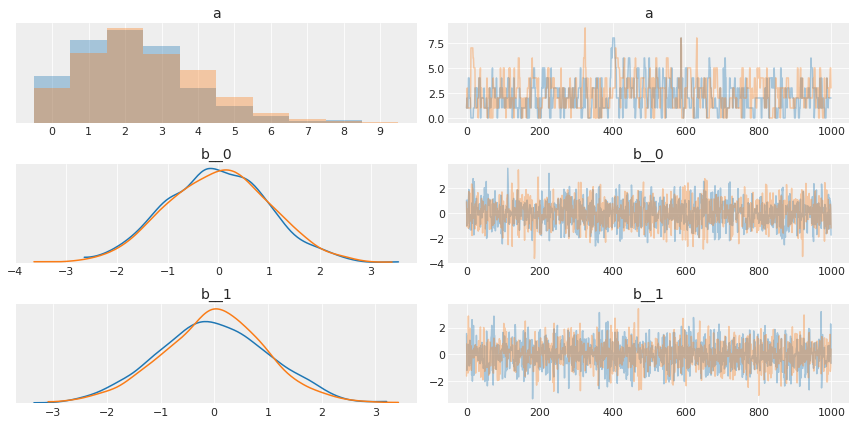

In [6]:
az.traceplot(trace);

On the left column we have the distributions of sampled values, histograms are used for discrete variables and kde for continuous ones. Notice that the variable `b` (with shape=2) is represented into 2 separated plot, one per axis. Chains are plotted using different colors blue ('C0') for the first chain and orange ('C1') for the second one. On the right we have the values of variables as a function of sampling step (1000 in this example).

You can specify the variables you want to plot by passing their names to `varnames`.

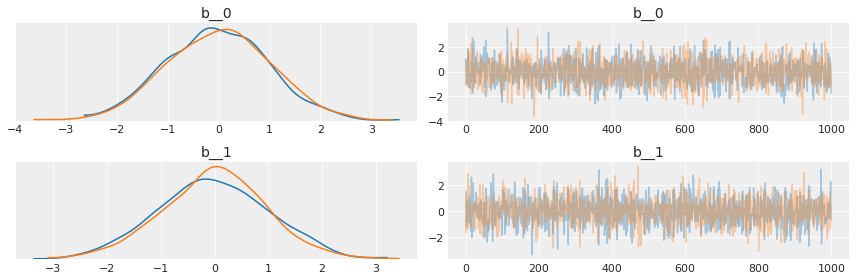

In [7]:
az.traceplot(trace, varnames=['b']);

Notice that we pass `b` and we still got both axis, without needing to specify them explicitly.

ArviZ is not also about plots, we can get also a text summary from the trace

In [8]:
az.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,2.33,1.57,0.07,0.00,5.00,369.46,1.01
b__0,-0.03,1.00,0.02,-2.05,1.85,2275.14,1.00
b__1,-0.03,0.99,0.02,-1.98,1.94,2345.41,1.00
